In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
import math
from keras.layers import Dense, LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio

In [2]:
stock=yf.download("TCS.BO",period="3y",actions=True)
stock

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2021-04-05,3171.000000,3262.550049,3151.250000,3239.300049,3127.676514,1005721,0.0,0.0
2021-04-06,3278.000000,3278.000000,3229.899902,3263.850098,3151.380859,105514,0.0,0.0
2021-04-07,3262.000000,3277.949951,3235.100098,3270.750000,3158.042969,68444,0.0,0.0
2021-04-08,3267.350098,3334.850098,3267.350098,3316.500000,3202.216553,73583,0.0,0.0
2021-04-09,3350.000000,3358.800049,3308.750000,3322.199951,3207.719971,98999,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-04-01,3900.000000,3932.000000,3886.600098,3915.250000,3915.250000,58865,0.0,0.0
2024-04-02,3889.949951,3905.500000,3875.000000,3882.600098,3882.600098,44046,0.0,0.0
2024-04-03,3859.550049,3981.199951,3855.699951,3947.250000,3947.250000,62264,0.0,0.0


<Axes: xlabel='Date', ylabel='Close'>

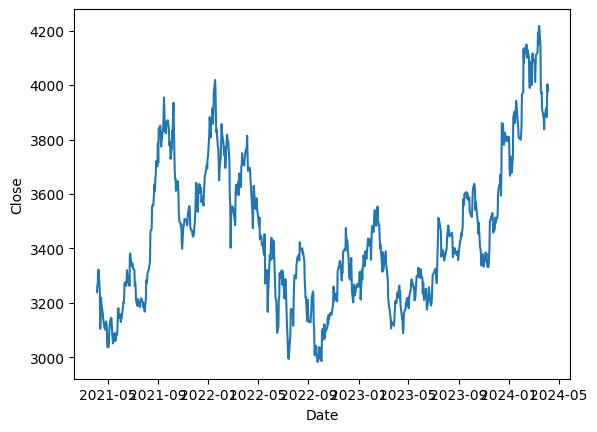

In [3]:
sns.lineplot(data=stock,x="Date",y="Close")

In [4]:
data=stock.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*0.75)
training_data_len

545

In [5]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.20774278],
       [0.22762619],
       [0.23321452],
       [0.27026805],
       [0.27488452],
       [0.20948401],
       [0.09897137],
       [0.19126096],
       [0.17048676],
       [0.14602742],
       [0.13063907],
       [0.11039123],
       [0.102859  ],
       [0.09581279],
       [0.12051515],
       [0.11419779],
       [0.10561262],
       [0.04503106],
       [0.04389727],
       [0.05357569],
       [0.0919657 ],
       [0.10407387],
       [0.12083904],
       [0.13148932],
       [0.11371176],
       [0.0856078 ],
       [0.05503357],
       [0.07046246],
       [0.08629631],
       [0.08030283],
       [0.06252527],
       [0.07904743],
       [0.08022196],
       [0.10622006],
       [0.14205873],
       [0.15987682],
       [0.13063907],
       [0.14266616],
       [0.1381711 ],
       [0.11865231],
       [0.12849268],
       [0.12986949],
       [0.16117276],
       [0.1763181 ],
       [0.17550819],
       [0.18891229],
       [0.23398389],
       [0.237

In [6]:
train_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    
    

In [7]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(485, 60, 1)

In [8]:
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\Omkar Singh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [10]:
model.fit(x_train,y_train,epochs=8,batch_size=1)

Epoch 1/8
485/485 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0143
Epoch 2/8
485/485 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0038
Epoch 3/8
485/485 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0031
Epoch 4/8
485/485 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0028
Epoch 5/8
485/485 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0023
Epoch 6/8
485/485 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0018
Epoch 7/8
485/485 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0021
Epoch 8/8
485/485 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0024


In [11]:
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [12]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [13]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [14]:
rmse= np.sqrt(((predictions - y_test) ** 2).mean())
rmse

74.40698754601286

In [15]:
closes=[]
closes.extend(data['Close'])
average_close = sum(closes) / len(closes)
#print(average_close)
average_deviation=rmse/average_close*100
average_deviation


2.153832290512745

In [16]:
train = data.iloc[:training_data_len]
valid = data.iloc[training_data_len:]
valid['Predictions'] = predictions



C:\Users\Omkar Singh\AppData\Local\Temp\ipykernel_12328\1670264632.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


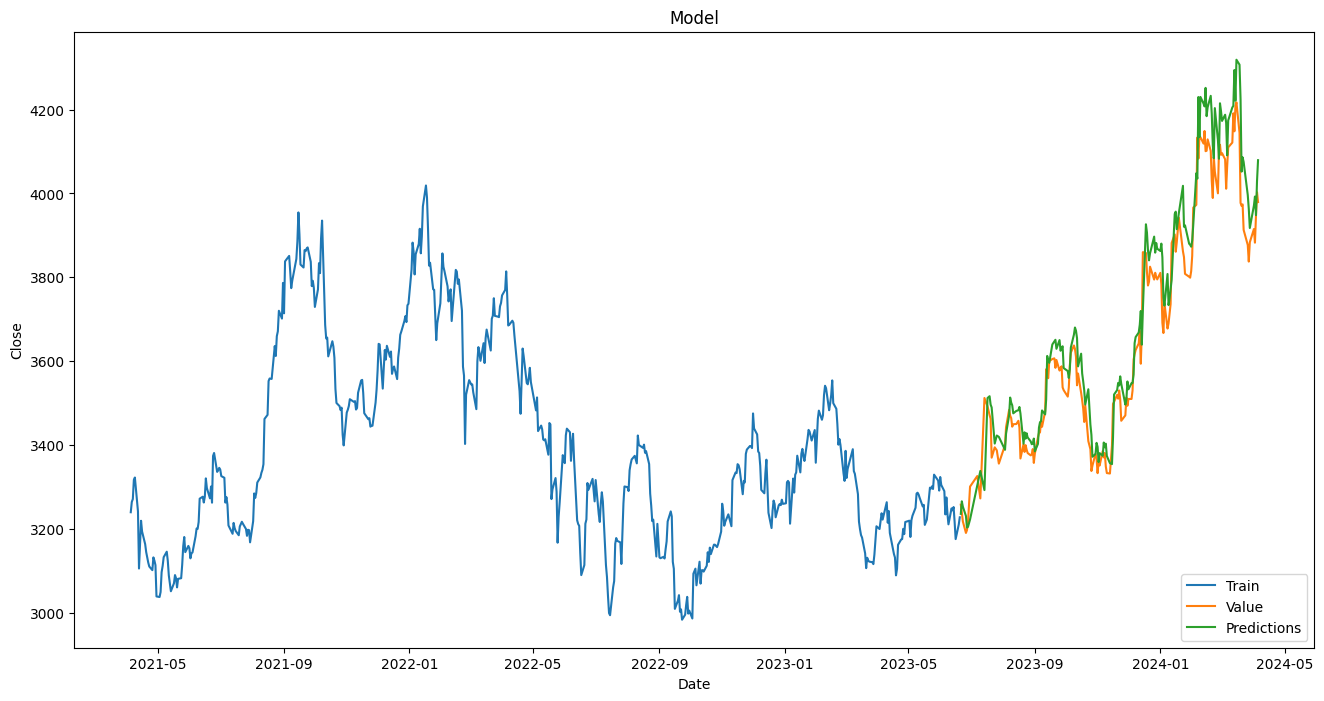

In [17]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Value','Predictions'], loc='lower right')
plt.show()

In [18]:
trace_train = go.Scatter(x=train.index, y=train['Close'], mode='lines', name='Train')
trace_valid = go.Scatter(x=valid.index, y=valid['Close'], mode='lines', name='Value')
trace_predictions = go.Scatter(x=valid.index, y=valid['Predictions'], mode='lines', name='Predictions')

# Define layout
layout = go.Layout(title='Model', xaxis=dict(title='Date'), yaxis=dict(title='Close'), legend=dict(x=0, y=1))

# Create figure
fig = go.Figure(data=[trace_train, trace_valid, trace_predictions], layout=layout)
pio.show(fig)

In [22]:
valid

,Close,Predictions
Date,,
2023-06-21,3257.449951,3235.417480
2023-06-22,3238.850098,3265.379639
2023-06-23,3217.449951,3252.637695
2023-06-26,3189.899902,3230.456055
2023-06-27,3196.600098,3202.626953
...,...,...
2024-04-01,3915.250000,3971.307373
2024-04-02,3882.600098,3992.707764
2024-04-03,3947.250000,3948.376953


In [23]:
valid.to_csv('example.csv', index=False)

quote=yf.download("TCS.BO",period=)
new_df=quote.filter(['Close'])
last_60_days=new_df[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)
X_test=np.array(X_test)
X_test=np.reshape(X_test.shape[0],(X_test.shape[0],X_test.shape[1],1))
pred_price=model.predict(X_test)
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)